<a href="https://colab.research.google.com/github/vivekvardhan03/AIML_BATCH_16/blob/main/spam%20email%20detection%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # data visualisation
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore") # ignore warnings

In [5]:
df = pd.read_csv("/content/archive (4).zip", encoding='latin-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.rename({'v1':'Spam','v2':'Mail'},axis=1,inplace=True) #Renaming the Columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1) #Removing the Last Three Columns
df

,Spam,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.describe() #Descriptive Summary of the dataset

,Spam,Mail
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.isnull().sum() #checking null values

Spam    0
Mail    0
dtype: int64

In [11]:
df.duplicated().sum() #checking duplicated values

403

In [12]:
df = df.drop_duplicates(keep='first') #remove duplicates
df.head()

,Spam,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.shape

(5169, 2)

In [14]:
df.duplicated().sum()

0

In [15]:
df.loc[:,'Spam']=df.Spam.map({'ham':0, 'spam':1}) #changing target column
df


,Spam,Mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


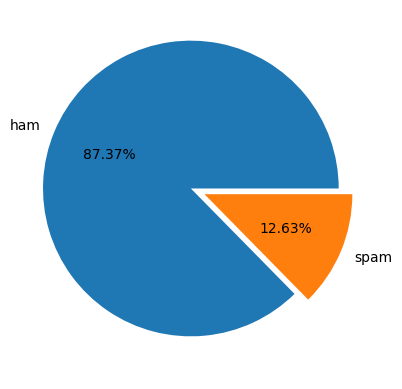

In [16]:
plt.pie(df['Spam'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()


In [17]:
df['no. of characters'] = df['Mail'].apply(len) # Number of Characters
df.head()

,Spam,Mail,no. of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Mail': [
        "Hello, this is a sample email.",
        "Thank you for your inquiry.",
        "Let's schedule a meeting next week."
    ]
}

df = pd.DataFrame(data)

# Download the NLTK data (if not already done)
nltk.download('punkt')

# Calculate the number of words in each email
df['no. of words'] = df['Mail'].apply(lambda x: len(nltk.word_tokenize(x)))

# Display the DataFrame
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                  Mail  no. of words
0       Hello, this is a sample email.             8
1          Thank you for your inquiry.             6
2  Let's schedule a meeting next week.             8


In [26]:
import nltk
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Mail': [
        "Hello, this is a sample email.",
        "Thank you for your inquiry.",
        "Let's schedule a meeting next week."
    ]
}

df = pd.DataFrame(data)

# Download the NLTK data (if not already done)
nltk.download('punkt')

# Calculate the number of sentences in each email
df['no. of sentences'] = df['Mail'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Display the DataFrame
print(df)


                                  Mail  no. of sentences
0       Hello, this is a sample email.                 1
1          Thank you for your inquiry.                 1
2  Let's schedule a meeting next week.                 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


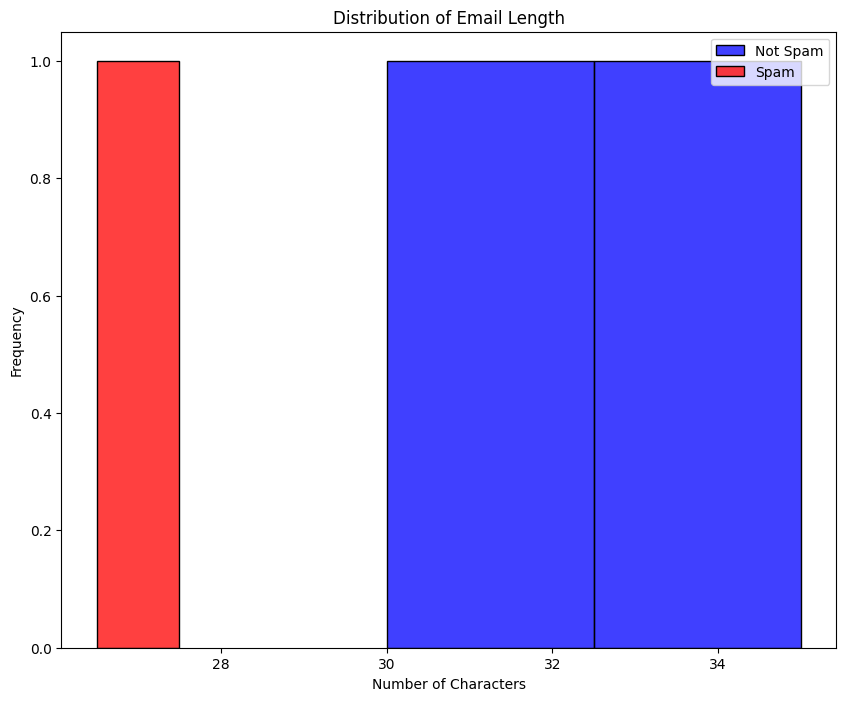

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Mail': [
        "Hello, this is a sample email.",
        "Thank you for your inquiry.",
        "Let's schedule a meeting next week."
    ],
    'Spam': [0, 1, 0]  # Example spam labels (0: not spam, 1: spam)
}

df = pd.DataFrame(data)

# Calculate the number of characters in each email (you can replace this with your actual data)
df['no. of characters'] = df['Mail'].apply(len)

# Create a histogram plot
plt.figure(figsize=(10, 8))
sns.histplot(df[df['Spam'] == 0]['no. of characters'], color='blue', label='Not Spam')
sns.histplot(df[df['Spam'] == 1]['no. of characters'], color='red', label='Spam')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Email Length')
plt.legend()
plt.show()


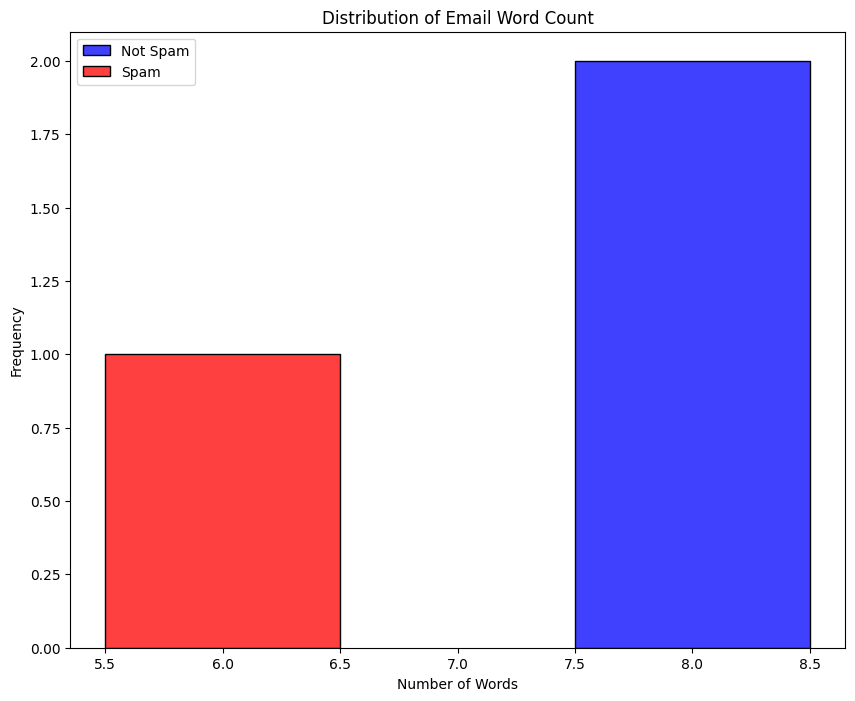

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Mail': [
        "Hello, this is a sample email.",
        "Thank you for your inquiry.",
        "Let's schedule a meeting next week."
    ],
    'Spam': [0, 1, 0]  # Example spam labels (0: not spam, 1: spam)
}

df = pd.DataFrame(data)

# Calculate the number of words in each email (you can replace this with your actual data)
df['no. of words'] = df['Mail'].apply(lambda x: len(nltk.word_tokenize(x)))

# Create a histogram plot
plt.figure(figsize=(10, 8))
sns.histplot(df[df['Spam'] == 0]['no. of words'], color='blue', label='Not Spam')
sns.histplot(df[df['Spam'] == 1]['no. of words'], color='red', label='Spam')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Email Word Count')
plt.legend()
plt.show()


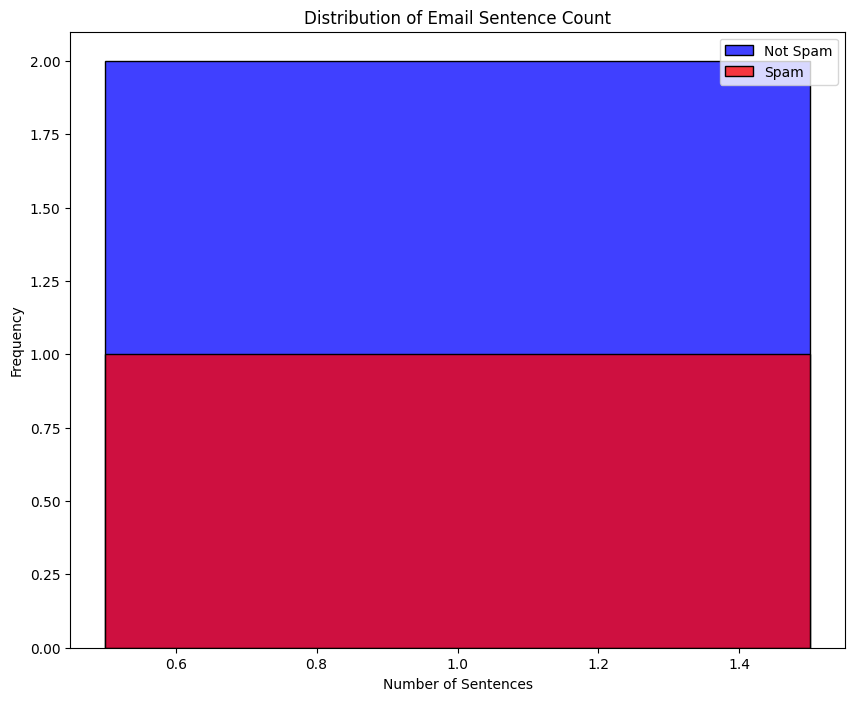

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Mail': [
        "Hello, this is a sample email.",
        "Thank you for your inquiry.",
        "Let's schedule a meeting next week."
    ],
    'Spam': [0, 1, 0]  # Example spam labels (0: not spam, 1: spam)
}

df = pd.DataFrame(data)

# Calculate the number of sentences in each email (you can replace this with your actual data)
df['no. of sentences'] = df['Mail'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Create a histogram plot
plt.figure(figsize=(10, 8))
sns.histplot(df[df['Spam'] == 0]['no. of sentences'], color='blue', label='Not Spam')
sns.histplot(df[df['Spam'] == 1]['no. of sentences'], color='red', label='Spam')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Email Sentence Count')
plt.legend()
plt.show()


In [33]:
ps = PorterStemmer()
def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)

    return " ".join(y)

In [35]:
# Define your custom text processing function
def custom_text_processing(text):
    # Your text processing logic goes here
    # For example, convert text to lowercase
    return text.lower()

# Apply the custom function to create a new column 'transformed_mail'
df['transformed_mail'] = df['Mail'].apply(custom_text_processing)

# Display the DataFrame
print(df)


                                  Mail  Spam  no. of sentences  \
0       Hello, this is a sample email.     0                 1   
1          Thank you for your inquiry.     1                 1   
2  Let's schedule a meeting next week.     0                 1   

                      transformed_mail  
0       hello, this is a sample email.  
1          thank you for your inquiry.  
2  let's schedule a meeting next week.  


In [36]:
df.head()

,Mail,Spam,no. of sentences,transformed_mail
0,"Hello, this is a sample email.",0,1,"hello, this is a sample email."
1,Thank you for your inquiry.,1,1,thank you for your inquiry.
2,Let's schedule a meeting next week.,0,1,let's schedule a meeting next week.


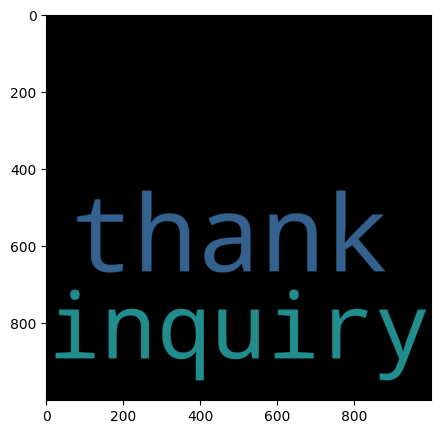

In [37]:
wc = WordCloud(width=1000,height=1000,min_font_size=15,background_color='black')
spam_wc = wc.generate(df[df['Spam'] == 1]['transformed_mail'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc)
plt.show()

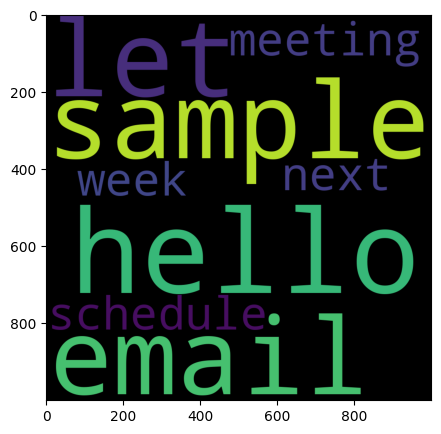

In [38]:
ham_wc = wc.generate(df[df['Spam'] == 0]['transformed_mail'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham_wc)
plt.show()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [40]:
tf = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X = tf.fit_transform(df['transformed_mail']).toarray()
X

array([[0.57735027, 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ,
        0.        , 0.5       , 0.        , 0.5       ]])

In [41]:
y = np.array(df['Spam'])
y

array([0, 1, 0])

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.3)

In [43]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name=''):
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

# Calculate metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)


# Print metrics
    print(f"{model_name} - Training Metrics: Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
    print(f"{model_name} - Test Metrics: Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
    print("----------------------------------------------------------------------------------")

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):X_train, y_train = ..., ...
X_test, y_test = ..., ...

models = [
    (LogisticRegression(), "Logistic Regression"),
    (MultinomialNB(), "Naive Bayes"),
    (RandomForestClassifier(), "Random Forest"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (LinearSVC(), "SVC")
]

for model, name in models:
    train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name=name)


In [51]:
model = LinearSVC()
model.fit(X_train, y_train)
def predict_Mail(model, message, vectorizer):
    input_features = vectorizer.transform([message])
    prediction = model.predict(input_features)[0]
    return "Spam" if prediction == 1 else "Ham"

In [52]:
test_mail1 = "URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"
print(f"Message: '{test_mail1}' is classified as {predict_Mail(model, test_mail1, tf)}")

Message: 'URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18' is classified as Ham


In [53]:
test_mail2 = "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."
print(f"Message: '{test_mail2}' is classified as {predict_Mail(model, test_mail2, tf)}")

Message: 'I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.' is classified as Spam
